# AI_MED2023 experiment #

#### 환경 설정 준비:
다음 라이브러리가 설치가 안 되어 있는 경우 #를 제거하고 실행하여 설치 후 # 처리를 한다.
Kmeans 가 에러가 발생하는 경우는 !pip install --upgrade threadpoolctl 을 수행한다.upgraded threadpoolctl from version 2.2.0 to version 3.1.0

In [20]:
# !pip install --update scikit-learn
# !pip install yellowbrick
# !pip install --upgrade pip
# !pip install --upgrade threadpoolctl

In [21]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.decomposition import SparsePCA
from sklearn import svm
from sklearn.svm import SVR
from sklearn.cluster import KMeans

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn import preprocessing

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from numpy.random import default_rng


from yellowbrick.cluster import KElbowVisualizer

import warnings
warnings.filterwarnings('ignore')

## Iris Data Import ##

<img src="iris_flower.png" width="400">
<img src="iris_feature.png" width="400">
<img src="iris_measure.png" width="400">

Load data

In [22]:
from sklearn import datasets
#importing the Iris dataset with sklearn
diabetes = datasets.load_diabetes()

diabetes["feature_names"]
data, target = diabetes["data"], diabetes["target"]
data[0]
target[0]

151.0

In [23]:
#importing the Iris dataset with pandas

dataset = pd.read_csv("C:/Users/yumin/Downloads/AIMED/diabetes.csv")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:,-1].values
feature_names = dataset.columns[:-1]
print(f"feature_names={feature_names}")
target_names = np.unique(y)
print(f"target_names={target_names}")


feature_names=Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')
target_names=[0 1]


In [24]:
print(X[:5])

[[6.000e+00 1.480e+02 7.200e+01 3.500e+01 0.000e+00 3.360e+01 6.270e-01
  5.000e+01]
 [1.000e+00 8.500e+01 6.600e+01 2.900e+01 0.000e+00 2.660e+01 3.510e-01
  3.100e+01]
 [8.000e+00 1.830e+02 6.400e+01 0.000e+00 0.000e+00 2.330e+01 6.720e-01
  3.200e+01]
 [1.000e+00 8.900e+01 6.600e+01 2.300e+01 9.400e+01 2.810e+01 1.670e-01
  2.100e+01]
 [0.000e+00 1.370e+02 4.000e+01 3.500e+01 1.680e+02 4.310e+01 2.288e+00
  3.300e+01]]


Check data

In [25]:
print(f"Type of X={type(X)}")
print(f"Type of feature_names={type(feature_names)}")
print(f"Type of target_names={type(target_names)}")
# print data size
print(X.shape, y.shape)
# print the label species
print(target_names)
# print the names of the features
print(feature_names)
# print the  data (top 5 records)
print(X[0:5])
# print the  labels
print(y)
print(type(X))

Type of X=<class 'numpy.ndarray'>
Type of feature_names=<class 'pandas.core.indexes.base.Index'>
Type of target_names=<class 'numpy.ndarray'>
(768, 8) (768,)
[0 1]
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')
[[6.000e+00 1.480e+02 7.200e+01 3.500e+01 0.000e+00 3.360e+01 6.270e-01
  5.000e+01]
 [1.000e+00 8.500e+01 6.600e+01 2.900e+01 0.000e+00 2.660e+01 3.510e-01
  3.100e+01]
 [8.000e+00 1.830e+02 6.400e+01 0.000e+00 0.000e+00 2.330e+01 6.720e-01
  3.200e+01]
 [1.000e+00 8.900e+01 6.600e+01 2.300e+01 9.400e+01 2.810e+01 1.670e-01
  2.100e+01]
 [0.000e+00 1.370e+02 4.000e+01 3.500e+01 1.680e+02 4.310e+01 2.288e+00
  3.300e+01]]
[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 

# Dimension reduction using PCA #

In [26]:
# 모델 구성
pca = PCA(n_components=2) # from four to two dimension

# 데이터로 모델 추정
pca.fit(X)

print(f"Explained variance={pca.explained_variance_ratio_}")


Explained variance=[0.88854663 0.06159078]


In [27]:
print(f"Lambda={pca.singular_values_}")
# principal components, weights for each variable
print(f"Components={pca.components_}")

Lambda=[3212.6611207   845.82919167]
Components=[[-2.02176587e-03  9.78115765e-02  1.60930503e-02  6.07566861e-02
   9.93110844e-01  1.40108085e-02  5.37167919e-04 -3.56474430e-03]
 [-2.26488861e-02 -9.72210040e-01 -1.41909330e-01  5.78614699e-02
   9.46266913e-02 -4.69729766e-02 -8.16804621e-04 -1.40168181e-01]]


In [28]:
# 데이터에 적용
X_r2 = pca.transform(X)
print('PCA DIM:',X.shape,'->',X_r2.shape)
print(f"PCA components={X_r2[0:10,:]}")

PCA DIM: (768, 8) -> (768, 2)
PCA components=[[-75.71465491 -35.95078264]
 [-82.3582676   28.90821322]
 [-74.63064344 -67.90649647]
 [ 11.07742273  34.89848586]
 [ 89.74378806  -2.74693708]
 [-80.97792192  -3.94688717]
 [  4.35095929  46.9339122 ]
 [-82.13729445   7.09795392]
 [468.86638868 -31.52825757]
 [-80.19384984 -18.04828293]]


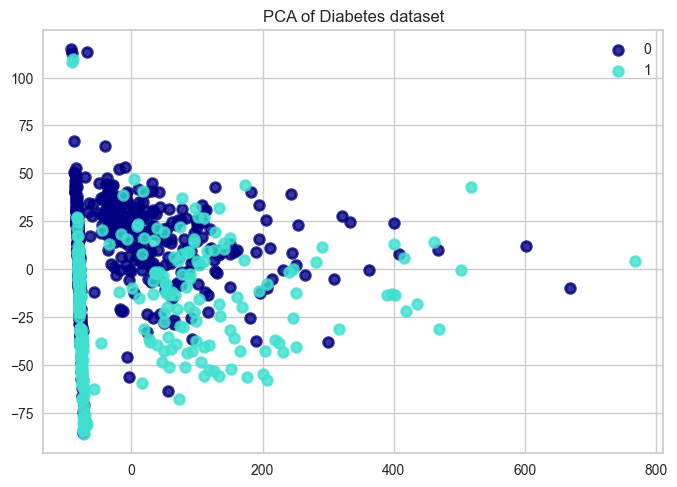

In [29]:
# Display PCA in 2D
X_r=X_r2
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2
for color, yclass, target_name in zip(colors, target_names, target_names):
    plt.scatter(X_r[y == yclass, 0], X_r[y == yclass, 1], color=color, alpha=.8, lw=lw,label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of Diabetes dataset')
plt.show()

PCA (768, 8) -> (768, 3)


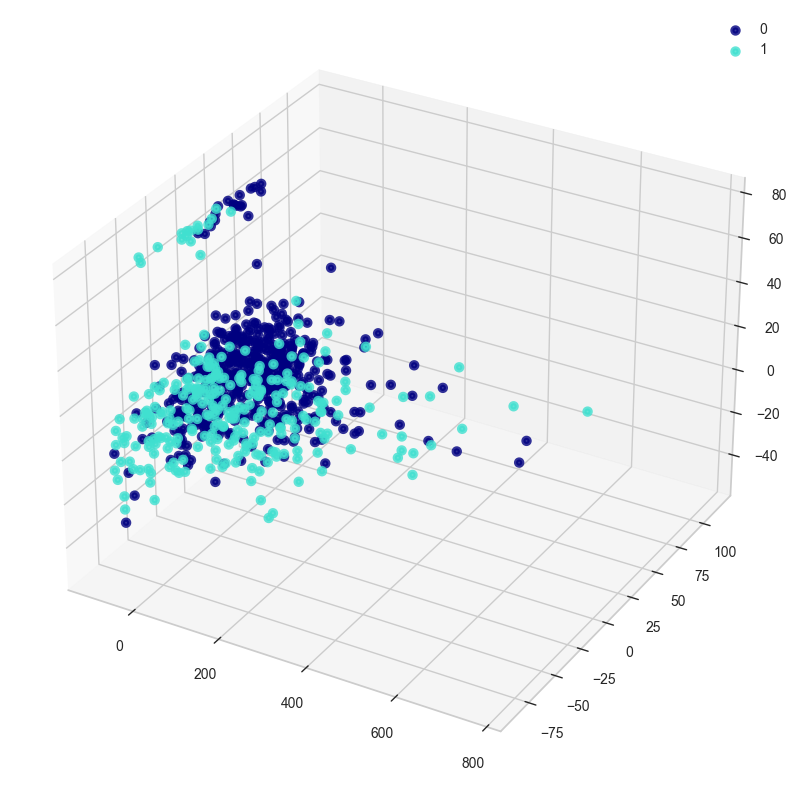

<Figure size 800x550 with 0 Axes>

In [30]:
# Display PCA in 3D
pca = PCA(n_components=3)
X_r3 = pca.fit(X).transform(X)
print('PCA',X.shape,'->',X_r3.shape)

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

X_r=X_r3
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 3
for color, yclass, target_name in zip(colors, target_names, target_names):
    ax.scatter3D(X_r[y == yclass, 0], X_r[y == yclass, 1], X_r[y == yclass, 2], color=color, alpha=.8, lw=lw,label=target_name)

ax.legend()
plt.show()

## Sparse PCA

To test the sparsity

In [31]:
rng = default_rng()
rvals = rng.standard_normal([X.shape[0],10])

In [32]:
Xtest=np.concatenate([X,rvals],1)
print(f"By concatenation raw data with noise, X dim={X.shape} -> Xtest dim={Xtest.shape}");

By concatenation raw data with noise, X dim=(768, 8) -> Xtest dim=(768, 18)


In [33]:
# 모델 구성
spca = SparsePCA(n_components=3,random_state=0) # from four to two dimension
# 데이터로 모델 추정
spca.fit(Xtest)

SparsePCA(n_components=3, random_state=0)

In [34]:
# principal components, weights for each variable
spca.components_

array([[-3.84295427e-03,  0.00000000e+00,  0.00000000e+00,
         6.51522421e-02,  9.97678846e-01,  8.73364815e-03,
         2.20923309e-04, -1.73490942e-02,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  3.66569251e-05,
        -5.16306579e-07, -8.69342840e-05,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.10851952e-04],
       [-1.71281512e-02, -9.87996546e-01, -0.00000000e+00,
         9.59247578e-02, -0.00000000e+00, -2.67204448e-02,
        -0.00000000e+00, -1.16844197e-01, -0.00000000e+00,
         1.18626667e-04, -3.35081122e-04, -0.00000000e+00,
        -0.00000000e+00,  2.98681929e-04, -9.40655279e-04,
        -0.00000000e+00,  5.55159461e-05, -4.91176354e-04],
       [-2.37313148e-02, -0.00000000e+00, -9.34576383e-01,
        -2.95010018e-01, -0.00000000e+00, -1.36710459e-01,
        -0.00000000e+00, -1.42414257e-01, -0.00000000e+00,
        -0.00000000e+00, -1.13403681e-03, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e

In [35]:
#apply old or new data to the trained pca model
Xs=spca.transform(Xtest)

In [36]:
# 비교 : PCA 모델 구성
pca1 = PCA(n_components=3,random_state=0) # from four to two dimension
# 데이터로 모델 추정
pca1.fit(Xtest)
Xp=pca1.transform(Xtest)

In [37]:
print(f"Xp={Xp[0:5,:5]}")
print(f"Xs={Xs[0:5,:]}")

Xp=[[-7.57145312e+01 -3.59512041e+01 -7.26395622e+00]
 [-8.23582023e+01  2.89107542e+01 -5.49990131e+00]
 [-7.46298078e+01 -6.79063942e+01  1.94596208e+01]
 [ 1.10774111e+01  3.48981850e+01 -4.66647570e-02]
 [ 8.97436929e+01 -2.74704347e+00  2.52079119e+01]]
Xs=[[-78.15791355 -26.61517249 -11.11635988]
 [-78.56726953  37.00009483   0.40473658]
 [-79.54628481 -61.68500188  10.10582779]
 [ 14.1969459   32.92270383   4.97263712]
 [ 88.69692027 -15.12243211  22.78132628]]


In [38]:
print(f"Cp={pca1.components_[:,:6]}")
print(f"Cs={spca.components_[:,:6]}")

Cp=[[-0.00202177  0.09781164  0.01609303  0.06075675  0.99311042  0.01401083]
 [-0.0226484  -0.97220268 -0.1419077   0.05785724  0.0946276  -0.04697424]
 [-0.02246442  0.14342749 -0.92245354 -0.30702538  0.02097815 -0.13244988]]
Cs=[[-0.00384295  0.          0.          0.06515224  0.99767885  0.00873365]
 [-0.01712815 -0.98799655 -0.          0.09592476 -0.         -0.02672044]
 [-0.02373131 -0.         -0.93457638 -0.29501002 -0.         -0.13671046]]


# K-means Clustering

In [39]:
print(X.shape)

(768, 8)


In [40]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 2,n_init = "auto") #init = 'k-means++', max_iter = 300,

In [41]:
y_kmeans = kmeans.fit_predict(X)

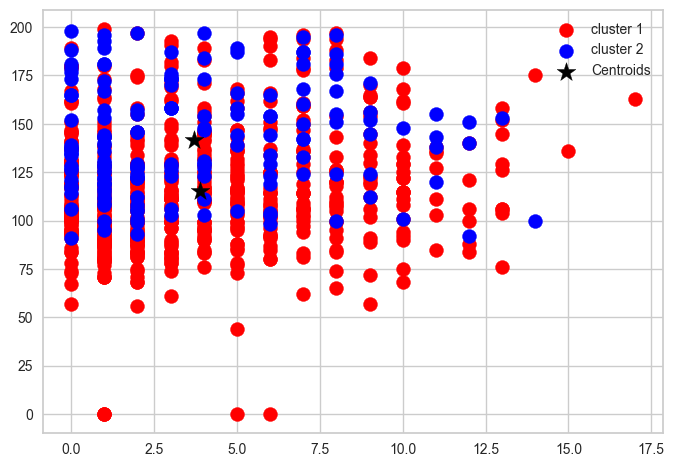

In [42]:
#Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'cluster 2')
# plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'cluster 3')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 200, c = 'black', marker='*',label = 'Centroids')
plt.legend()

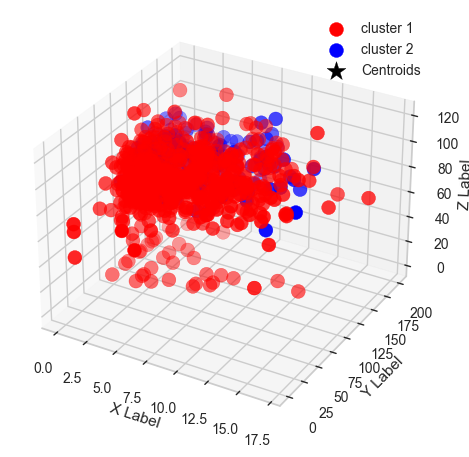

In [43]:
fig=plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], X[y_kmeans == 0, 2],s = 100, c = 'red', label = 'cluster 1')
ax.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], X[y_kmeans == 1, 2],s = 100, c = 'blue', label = 'cluster 2')
# ax.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], X[y_kmeans == 2, 2],s = 100, c = 'green', label = 'cluster 3')

#Plotting the centroids of the clusters
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], s = 200, c = 'black', marker='*',label = 'Centroids')
plt.legend()

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

## Check Data Group using K-Means Clustering #

### 1. Elbow Method

Select the scoring metric to evaluate the clusters. The default is the mean distortion, defined by the sum of squared distances between each observation and its closest centroid. Other metrics include:

1. distortion: mean sum of squared distances to centers
2. silhouette: mean ratio of intra-cluster and nearest-cluster distance
3. calinski_harabasz: ratio of within to between cluster dispersion

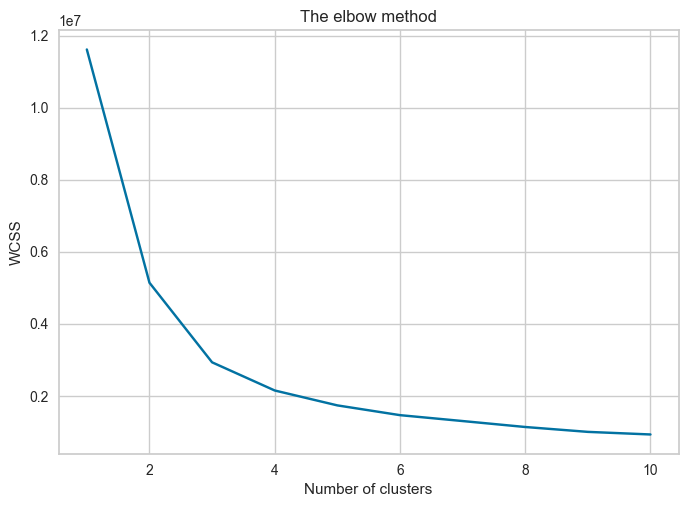

In [44]:
wcss=[]
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

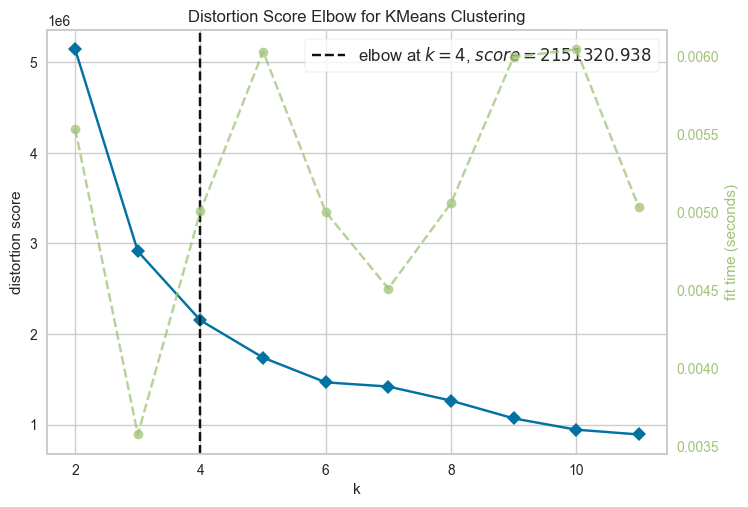

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [45]:
# Instantiate the clustering model and visualizer
model = KMeans(n_init='auto')
visualizer = KElbowVisualizer(model, k=(2,12)) #default metric: distortion

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

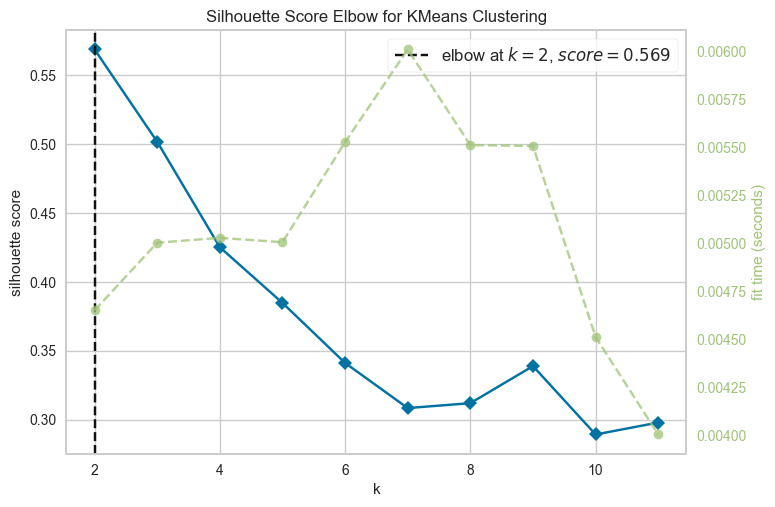

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [46]:
# Instantiate the clustering model and visualizer
model = KMeans(n_init='auto')
visualizer = KElbowVisualizer(model, k=(2,12),metric='silhouette')

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

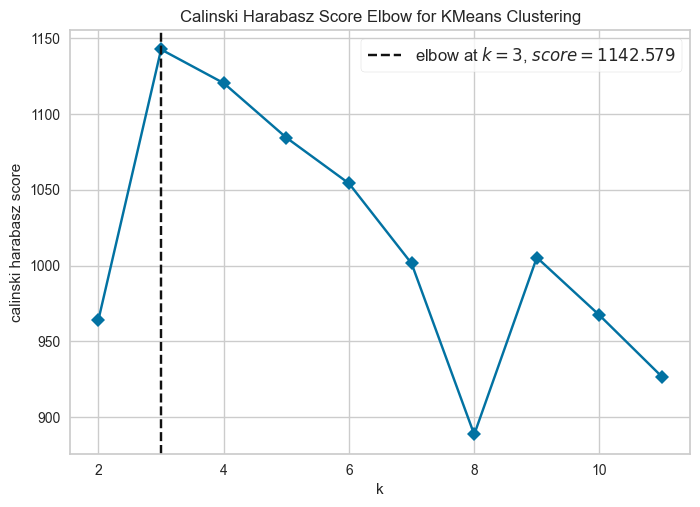

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [47]:
# Instantiate the clustering model and visualizer
model = KMeans(n_init='auto')
visualizer = KElbowVisualizer(
    model, k=(2,12), metric='calinski_harabasz', timings=False
)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

### 실루엣 분석(Silhouette Analysis) : Clustering 적절성 분석

In [48]:
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl
from yellowbrick.cluster import InterclusterDistance
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

### 좋은 군집화 조건
1. 전체 실루엣 계수의 평균값, 즉 사이킷런의 shihoutte_score()값은 0~1사이의 값을 가지며, 1에 가까울수록 좋다.
2. 전체 실루엣 계수의 평균값과 더불어 개별 군집의 평균값의 편차가 크지 않아야 한다.
즉, 개별 군집의 실루엣 계수 평균값이 전체 실루엣 계수의 평균값에서 크게 벗어나지 않는 것이 중요하다.
만약 전체 실루엣 계수의 평균값은 높지만, 특정 군집의 실루엣 계수 평균값만 유난히 높고 다른 군집들의 실루엣 계수 평균값은 낮으면 좋은 군집화 조건이 아니다.

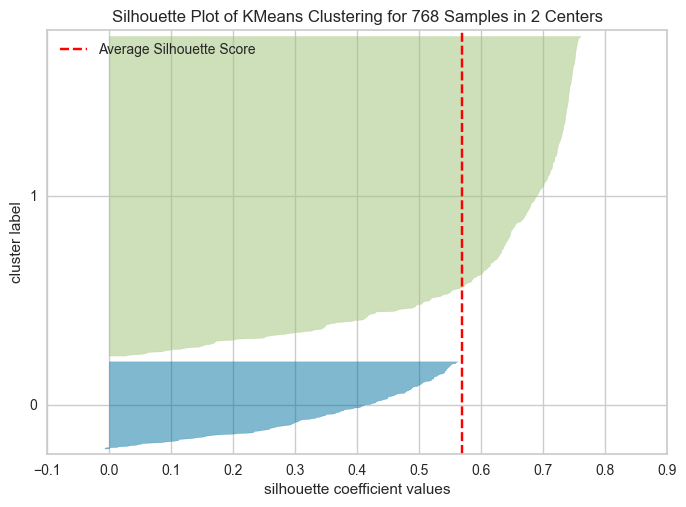

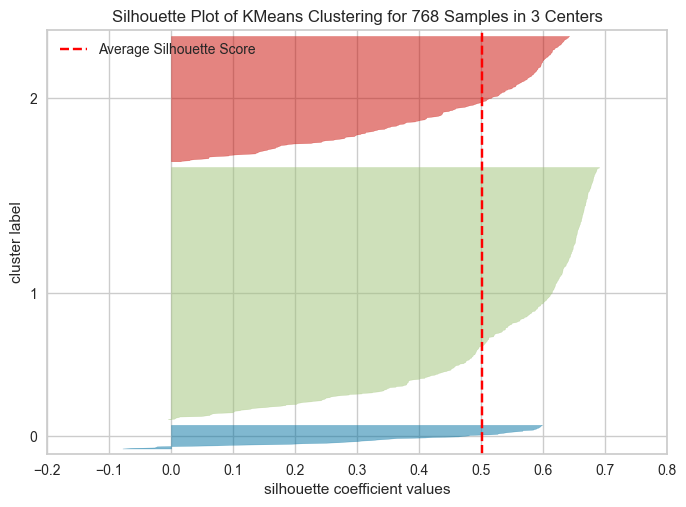

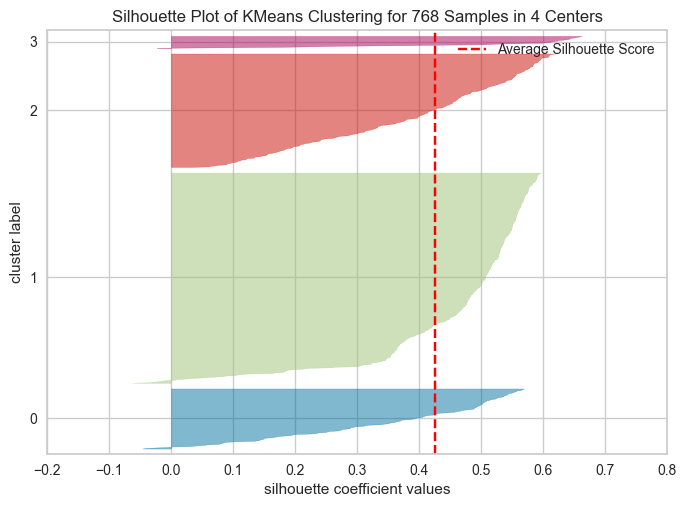

In [49]:
for k in range(2,5):
    model = KMeans(k, random_state=42,n_init='auto')
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

    visualizer.fit(X)        # Fit the data to the visualizer
    visualizer.show()        # Finalize and render the figure

In [50]:


for n_clusters in range(2,5):
    clusterer = KMeans(n_clusters=n_clusters, random_state=10,n_init='auto')
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )


For n_clusters = 2 The average silhouette_score is : 0.5687897205830247
For n_clusters = 3 The average silhouette_score is : 0.5228196874659858
For n_clusters = 4 The average silhouette_score is : 0.425157227030241


### Intercluster Distance Maps

In [51]:
# Instantiate the clustering model and visualizer
model = KMeans(3, random_state=42,n_init='auto')

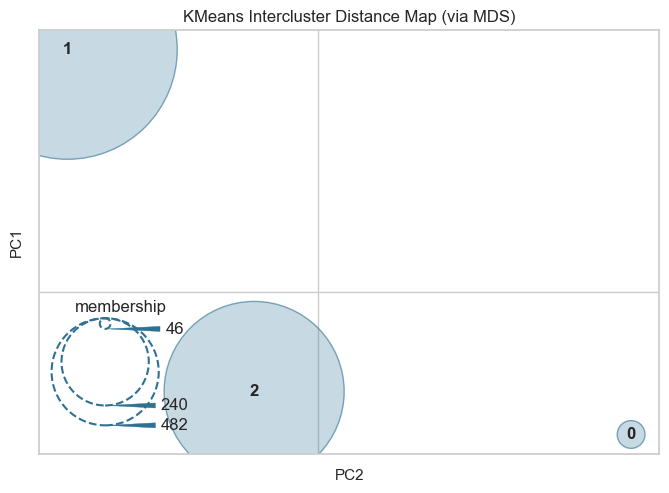

<Axes: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [52]:
visualizer = InterclusterDistance(model,normalized_stress='auto')
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

# Support Vector Machine #

We can now quickly sample a training set while holding out 40% of the data for testing (evaluating) our classifier:

$Φ(w) = ½ |w|^2 + C Σξ_i $ is minimized and for all {(xi ,yi)}

In [53]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:,-1].values

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [55]:
# check train and test data set
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(576, 8) (576,)
(192, 8) (192,)


## Core steps of SVM

Core steps of SVM

In [56]:
# 모델 생성
model = svm.SVC(kernel='linear',C=1) #kernel='rbf'
# 데이터 이용 모델 파라미터 추정
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print('Accuracy:',model.score(X_test,y_test),'with C=1') # accuracy

0.8020833333333334
Accuracy: 0.8020833333333334 with C=1


In [57]:
X_train.shape

(576, 8)

In [58]:
#predict a new data set
model = svm.SVC(kernel='linear',C=1) #kernel='rbf'
model.fit(X_train, y_train)
species_idx = model.predict([[1,189,60,23,846,30.1,0.398,59]])[0]
print('You entered',species_idx)

You entered 1


Full steps of SVM

In [59]:
for kernel in ['linear','rbf']:
    print('Kernel=',kernel)
    for c in [0.01,0.1,1,10,100,1000]:
        model = svm.SVC(kernel=kernel,C=c) #kernel='rbf'
        model.fit(X_train, y_train)
        acc=model.score(X_test,y_test)
        print('   Accuracy:{:4.3f} with C={}'.format(acc,c)) # accuracy

Kernel= linear
   Accuracy:0.802 with C=0.01
   Accuracy:0.802 with C=0.1
   Accuracy:0.802 with C=1
   Accuracy:0.802 with C=10
   Accuracy:0.781 with C=100
   Accuracy:0.776 with C=1000
Kernel= rbf
   Accuracy:0.677 with C=0.01
   Accuracy:0.708 with C=0.1
   Accuracy:0.771 with C=1
   Accuracy:0.807 with C=10
   Accuracy:0.792 with C=100
   Accuracy:0.771 with C=1000


## Confusion matrix

In [60]:
model = svm.SVC(C=1) #kernel='rbf'
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [61]:
print(target_names.tolist())

[0, 1]


Text(0.5, 1.0, 'Confusion Matrix for SVC\nfor IRIS')

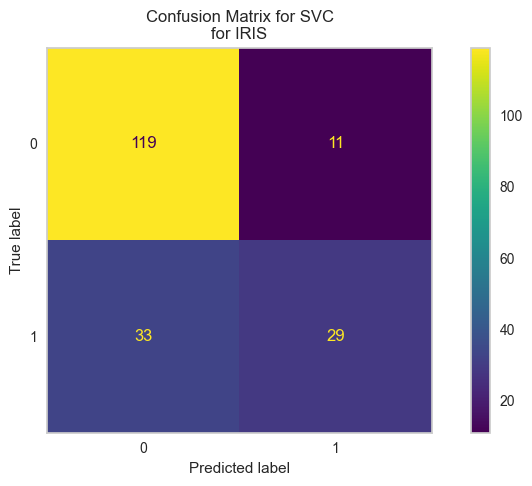

In [62]:
# Confusion matrix display

fig, ax = plt.subplots(figsize=(10, 5))
cmd=ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax,display_labels=target_names)
ax.grid(False)
ax.set_title(f"Confusion Matrix for {model.__class__.__name__}\nfor IRIS")

## Computing 5-fold cross-validation ##

In [63]:
model=svm.SVC(kernel='linear',C=1)
scores = cross_val_score(model, X, y, cv=5)

In [64]:
scores.mean()

0.7656820303879128

In [65]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.77 (+/- 0.05)


In [66]:
for kernel in ['linear','rbf']:
    print('Kernel=',kernel)
    for c in [0.01,0.1,1,10,100,1000]:
        model = svm.SVC(kernel=kernel,C=c) #kernel='rbf'
        scores = cross_val_score(model, X, y, cv=5)
        print("Accuracy C=%d: %0.2f (+/- %0.2f)" % (c, scores.mean(), scores.std() * 2))

Kernel= linear
Accuracy C=0: 0.77 (+/- 0.04)
Accuracy C=0: 0.77 (+/- 0.04)
Accuracy C=1: 0.77 (+/- 0.05)
Accuracy C=10: 0.77 (+/- 0.05)
Accuracy C=100: 0.76 (+/- 0.07)
Accuracy C=1000: 0.77 (+/- 0.06)
Kernel= rbf
Accuracy C=0: 0.65 (+/- 0.00)
Accuracy C=0: 0.67 (+/- 0.03)
Accuracy C=1: 0.76 (+/- 0.04)
Accuracy C=10: 0.76 (+/- 0.04)
Accuracy C=100: 0.76 (+/- 0.07)
Accuracy C=1000: 0.74 (+/- 0.04)


## Receiver Operating Characteristic (ROC) analysis

In [67]:
#importing the Iris dataset with pandas
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:,-1].values
feature_names = dataset.columns[:-1]
print(f"feature_names={feature_names}")
target_names = np.unique(y)
print(f"target_names={target_names}")

feature_names=Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')
target_names=[0 1]


In [68]:
y1 = label_binarize(y, classes=target_names)
n_classes = y1.shape[1]
print(y1[::25])

[[1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]]


### Multiclass training ###

In [69]:
# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape

# shuffle and split training and test sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.25, random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(
    svm.SVC(kernel="linear", probability=True,random_state=random_state)
)
y_score = classifier.fit(X1_train, y1_train).decision_function(X1_test)

In [70]:
print(y_score[:5])

[ 2.47418059 -1.36448364 -1.90826197  0.49765315 -1.59572258]


## Important Features ##

In [71]:
def f_importances0(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::][0:top], align='center')
    plt.yticks(range(top), names[::][0:top])
    plt.show()

Two groups

In [72]:
dataset = pd.read_csv('C:/Users/yumin/Downloads/AIMED/diabetes.csv')
X1 = dataset.iloc[:100, :-1].values
y1 = dataset.iloc[:100,-1].values
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=0)

In [73]:
model = svm.SVC(kernel='linear',C=1)
model.fit(X1_train, y1_train)
acc=model.score(X1_test,y1_test)
print('   Accuracy:{:4.3f} with C={}'.format(acc,c)) # accuracy

   Accuracy:0.550 with C=1000


In [74]:
model.coef_

array([[ 0.17719153,  0.01692589, -0.03107029,  0.03305742, -0.00213608,
         0.06725084,  0.07989424,  0.03857688]])

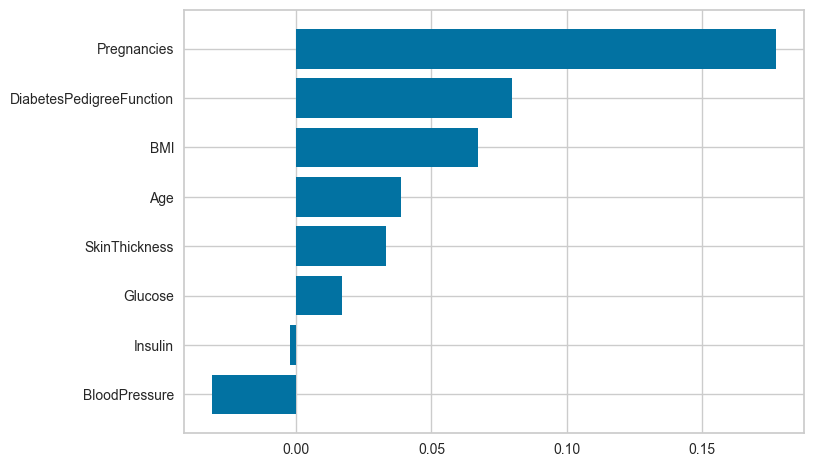

In [75]:
f_importances(model.coef_[0], feature_names)

If you're using rbf (Radial basis function) kernal, you can use

In [76]:
#The permutation feature importance is defined to be the decrease in a model score
# when a single feature value is randomly shuffled

Text(0.5, 0, 'Permutation Importance')

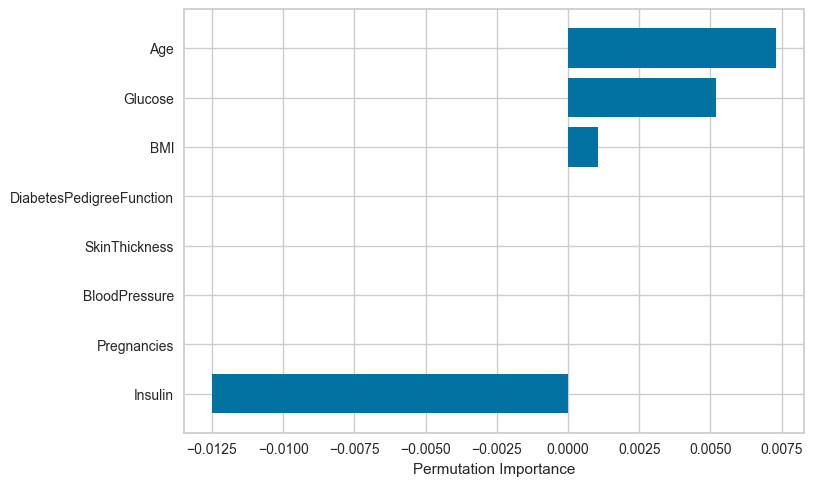

In [77]:
model = svm.SVC(kernel='rbf',C=1)
model.fit(X1_train, y1_train)
acc=model.score(X1_test,y1_test)
perm_importance = permutation_importance(model, X_test, y_test)
features = np.array(feature_names)
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

Three groups

In [78]:
model = svm.SVC(kernel='linear',C=1)
model.fit(X_train, y_train)
acc=model.score(X_test,y_test)
print('   Accuracy:{:4.3f} with C={}'.format(acc,c)) # accuracy

   Accuracy:0.802 with C=1000


In [79]:
model.coef_

array([[ 6.56500671e-02,  2.88114141e-02, -1.13276301e-02,
        -3.63123774e-05, -3.33336496e-04,  6.91945316e-02,
         6.20203582e-01,  1.40528141e-02]])

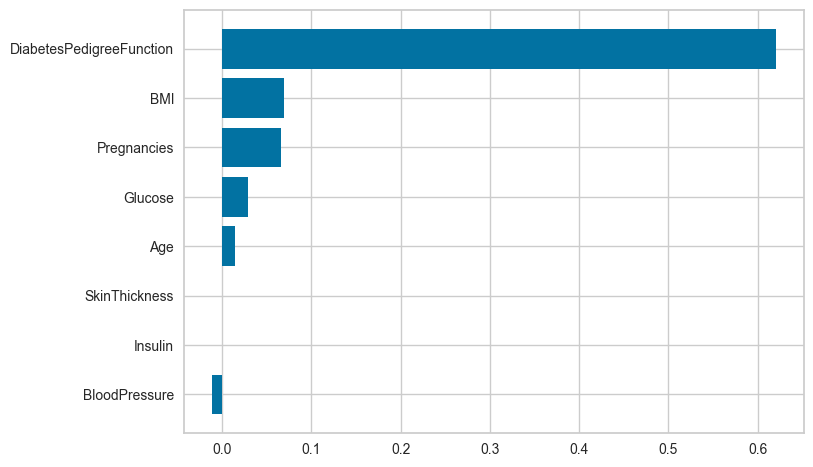

In [80]:
f_importances(model.coef_[0], feature_names)

## Data transformation by normalization

In [81]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)

In [82]:
scaler.mean_

array([  3.84027778, 121.15625   ,  69.68402778,  21.12673611,
        84.18402778,  32.20885417,   0.4685434 ,  33.58333333])

In [83]:
model = svm.SVC(kernel='linear',C=1.0,gamma='auto') #kernel='linear'
model.fit(X_train_transformed, y_train)
y_pred=model.predict(X_test_transformed)
model.score(X_test_transformed,y_test) # accuracy

0.8020833333333334

# Random Forest #

![random_forest.png](attachment:random_forest.png)

In [84]:
#importing the Iris dataset with pandas
dataset = pd.read_csv('C:/Users/yumin/Downloads/AIMED/diabetes.csv')
# X = dataset.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7]].values
# y = dataset.iloc[:,8].values
# feature_names = dataset.columns[0, 1, 2, 3, 4, 5, 6, 7]]
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:,-1].values
feature_names = dataset.columns[:-1]
print(f"feature_names={feature_names}")
target_names = np.unique(y)
print(f"target_names={target_names}")

feature_names=Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')
target_names=[0 1]


In [85]:
# Creating a DataFrame of given iris dataset in a simple way
data=pd.DataFrame({
    'Pregnancies':X[:,0],
    'Glucose':X[:,1],
    'BloodPressure':X[:,2],
    'SkinThickness':X[:,3],
    'Insulin':X[:,3],
    'BMI':X[:,3],
    'DiabetesPedigreeFunction':X[:,3],
    'Age':X[:,3],
    'Outcome':y
})
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,35.0,35.0,35.0,35.0,1
1,1.0,85.0,66.0,29.0,29.0,29.0,29.0,29.0,0
2,8.0,183.0,64.0,0.0,0.0,0.0,0.0,0.0,1
3,1.0,89.0,66.0,23.0,23.0,23.0,23.0,23.0,0
4,0.0,137.0,40.0,35.0,35.0,35.0,35.0,35.0,1
5,5.0,116.0,74.0,0.0,0.0,0.0,0.0,0.0,0
6,3.0,78.0,50.0,32.0,32.0,32.0,32.0,32.0,1
7,10.0,115.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8,2.0,197.0,70.0,45.0,45.0,45.0,45.0,45.0,1
9,8.0,125.0,96.0,0.0,0.0,0.0,0.0,0.0,1


In [86]:
# Create a DataFrame from X and feature_names dynamically
data = pd.DataFrame({feature_name: X[:, i] for i, feature_name in enumerate(feature_names)})
data['Outcome'] = y

# Display the resulting DataFrame
print(data.head())



   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0      0.0  33.6   
1          1.0     85.0           66.0           29.0      0.0  26.6   
2          8.0    183.0           64.0            0.0      0.0  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          0.0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.627  50.0        1  
1                     0.351  31.0        0  
2                     0.672  32.0        1  
3                     0.167  21.0        0  
4                     2.288  33.0        1  


In [87]:
# Import train_test_split function
X=data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]  # Features
y=data['Outcome']  # Labels

In [88]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [89]:
#Import Random Forest Model

#Create a Gaussian Classifier
model=RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)

y_pred=model.predict(X_test)
print(y_pred)
model.score(X_test,y_test)

[0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0
 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1
 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1 0 0 0 1 0
 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 0
 1 0 0 0 0 1 0 0 0]


0.7532467532467533

### Confusion matrix

Text(0.5, 1.0, 'Confusion Matrix for RandomForestClassifier\n Diabetes')

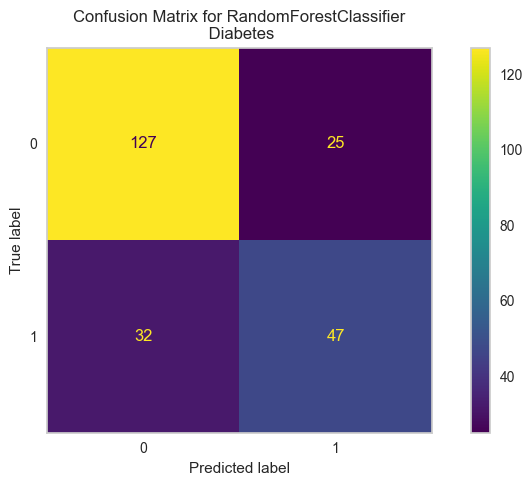

In [90]:
fig, ax = plt.subplots(figsize=(10, 5))
cmd=ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax,display_labels=target_names)
ax.grid(False)
ax.set_title(f"Confusion Matrix for {model.__class__.__name__}\n Diabetes")

In [113]:
#new sample data
species_idx = model.predict([[1,189,60,23,846,30.1,0.398,59]])[0]
print(species_idx)

1


In [115]:
feature_imp = pd.Series(model.feature_importances_,index=diabetes.feature_names[:8]).sort_values(ascending=False)
feature_imp

sex    0.239271
s2     0.161515
s3     0.139610
s4     0.132532
bmi    0.093224
age    0.090381
bp     0.073408
s1     0.070060
dtype: float64

In [116]:
!pip install seaborn

Finding Important Features

In [117]:
#!pip install seaborn
import seaborn as sns
%matplotlib inline


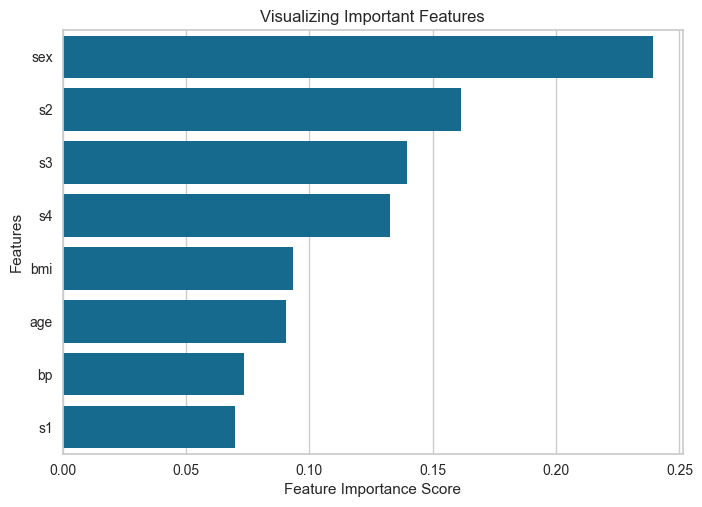

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
feature_imp = pd.Series(model.feature_importances_,index=diabetes.feature_names[:8]).sort_values(ascending=False)
feature_imp
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

## Generating the Model on Selected Features
We can remove the "sepal width" feature because it has very low importance, and select the 3 remaining features.

In [120]:
# Split dataset into features and labels
X=data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]  # Removed feature "sepal length"
y=data['Outcome']
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0    148.0           72.0           35.0      0.0  33.6   
1            1.0     85.0           66.0           29.0      0.0  26.6   
2            8.0    183.0           64.0            0.0      0.0  23.3   
3            1.0     89.0           66.0           23.0     94.0  28.1   
4            0.0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763         10.0    101.0           76.0           48.0    180.0  32.9   
764          2.0    122.0           70.0           27.0      0.0  36.8   
765          5.0    121.0           72.0           23.0    112.0  26.2   
766          1.0    126.0           60.0            0.0      0.0  30.1   
767          1.0     93.0           70.0           31.0      0.0  30.4   

     DiabetesPedigreeFunction   Age  
0                       0.627  50.0  
1                       0.351  31.0

In [104]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [105]:
#Create a Gaussian Classifier
model=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
model.fit(X_train,y_train)

# prediction on test set
y_pred=model.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7792207792207793


In [106]:

#Create a Gaussian Classifier
model=RandomForestClassifier(n_estimators=100,criterion='entropy')

#Train the model using the training sets y_pred=clf.predict(X_test)
model.fit(X_train,y_train)

# prediction on test set
y_pred=model.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7835497835497836


## 기타
### Feature selection:
https://scikit-learn.org/stable/modules/classes.html?highlight=feature%20selection#module-sklearn.feature_selection